In [271]:
import pandas as pd
import matplotlib.pyplot as plt

In [272]:
file = "Appendix B (shares).xls" #storing mt file path
  
FAH_sheets = {  #using a dictionary to map my time period labels with my FAH sheet names
    "1994-1998": "94-98 FAH",
    "2003-2004": "03-04 FAH",
    "2005-2006": "05-06 FAH",
    "2007-2008": "07-08 FAH"
}

fruits = [ #fruit types I'm considering
    "apples as fruit", "bananas", "berries", "grapes", "melons",
    "oranges, total", "other citrus fruit", "stone fruit", "tropical fruit"
]

dairy = ["fluid milk, total", "butter", "cheese", "yogurt", "dairy, other"] # dairy types

In [273]:
def loaded_data(sheet_name, start_column=7, start_row=77):  # using a helper function for getting mean pounds consumption data for men and women
    df = pd.read_excel(file, sheet_name= sheet_name, header = None, engine="xlrd")
    data_cleaned = df.iloc[start_row:, [0, start_column, 10]] #reading from row 77, in columns 0, 7, and 10
    data_cleaned.columns = ["Category", "Men", "Women"] #renaming my columns
    data_cleaned["Category_clean"] = data_cleaned["Category"].astype(str).str.strip().str.lower() 
    return data_cleaned

In [274]:
def type_filter(data_cleaned, keywords): #getting the rows that only match my types
    mask = data_cleaned["Category_clean"].apply(
        lambda x: any(kw in x for kw in keywords)
    )
    filtered = data_cleaned.loc[mask, ["Category", "Category_clean", "Men", "Women"]]
    filtered = filtered.set_index("Category")[["Men", "Women"]].groupby(level=0).first()
    return filtered

m_fruit, w_fruit = {}, {} # empty dictionaries for the results for fruits for women and men
m_dairy, w_dairy = {}, {} # again empty dictionaries but now for the dairy results

In [275]:
for period, sheet in FAH_sheets.items(): # for m time periods in each sheet
    data = loaded_data(sheet, start_column=7) 
    fruits_df = type_filter(data, fruits) # filter for the fruit rows
    dairy_df = type_filter(data, dairy)  #filter for the dairy
    m_fruit[period] = fruits_df["Men"] # storing my values for fruit for men
    w_fruit[period] = fruits_df["Women"]
    m_dairy[period] = dairy_df["Men"]   #storing my results for dairy for men
    w_dairy[period] = dairy_df["Women"]
m_fruit_df = pd.DataFrame(m_fruit)
w_fruit_df = pd.DataFrame(w_fruit)
m_dairy_df = pd.DataFrame(m_dairy)
w_dairy_df = pd.DataFrame(w_dairy)

In [299]:
def plot_lines(df, title, ylabel): # plotting my data
    fig, axis = plt.subplots(figsize=(12,9))
    colors = [ "red", "blue", "green", "orange", "purple","brown", "pink", "cyan", "magenta"] #manually defining my colors to make sure they are distinct and easy to read
    linestyles = ["-", "--", "-.",":", (0, (5, 10))]
    for i, (label, row) in enumerate(df.iterrows()): #giving each product or type a different color and line style
        color = colors[i % len(colors)]
        style = linestyles[i % len(linestyles)]
        axis.plot(df.columns, row.values, marker="o", linestyle=style, color=color, label=label)
    axis.set_title(title)  # line plot title
    axis.set_xlabel("Time Period") #labelling my x-axis
    axis.set_ylabel(ylabel)
    axis.legend(title="Product", bbox_to_anchor=(1.10, 1), loc="upper left")
    
    plt.figtext( # giving the source of my data for good design principles
        0, 0,
        "Data Source: U.S. Department of Agriculture, Economic Research Service\nhttps://www.ers.usda.gov/publications/pub-details?pubid=81817",
        fontsize=10
    )
    plt.show()

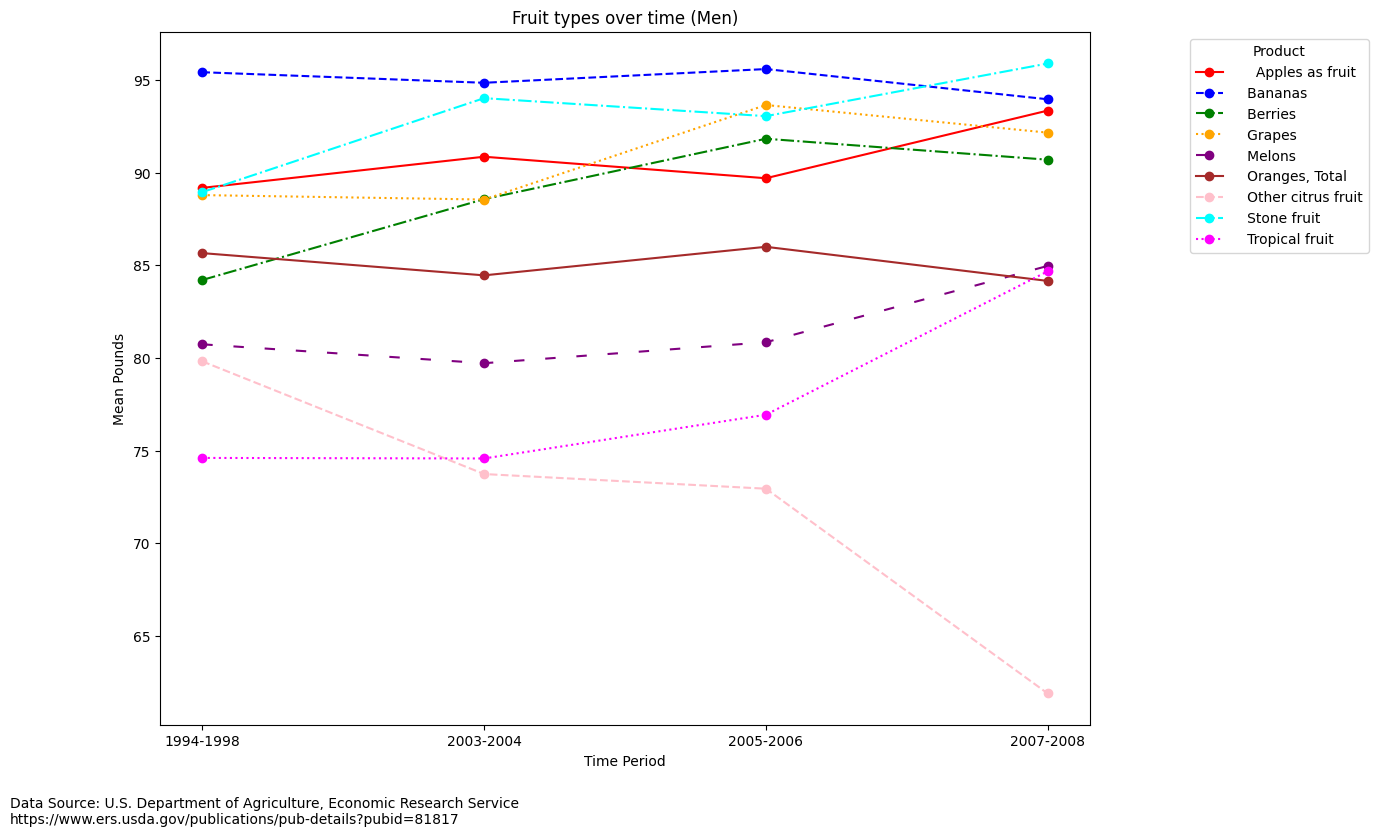

In [300]:
plot_lines(m_fruit_df, "Fruit types over time (Men)", "Mean Pounds") # making my first line plot

Caption: This visualization shows men’s mean pound fruit consumption over periods of time ranging from 1994 to 2008, with bananas and stone fruit remaining almost consistently the highest, while tropical fruit and citrus fruit remain the lowest. Citrus fruit drops drastically from 2005–2008, while tropical does the opposite with a steady increase from 2003-2005, and a sharp increase from 2005-2008.

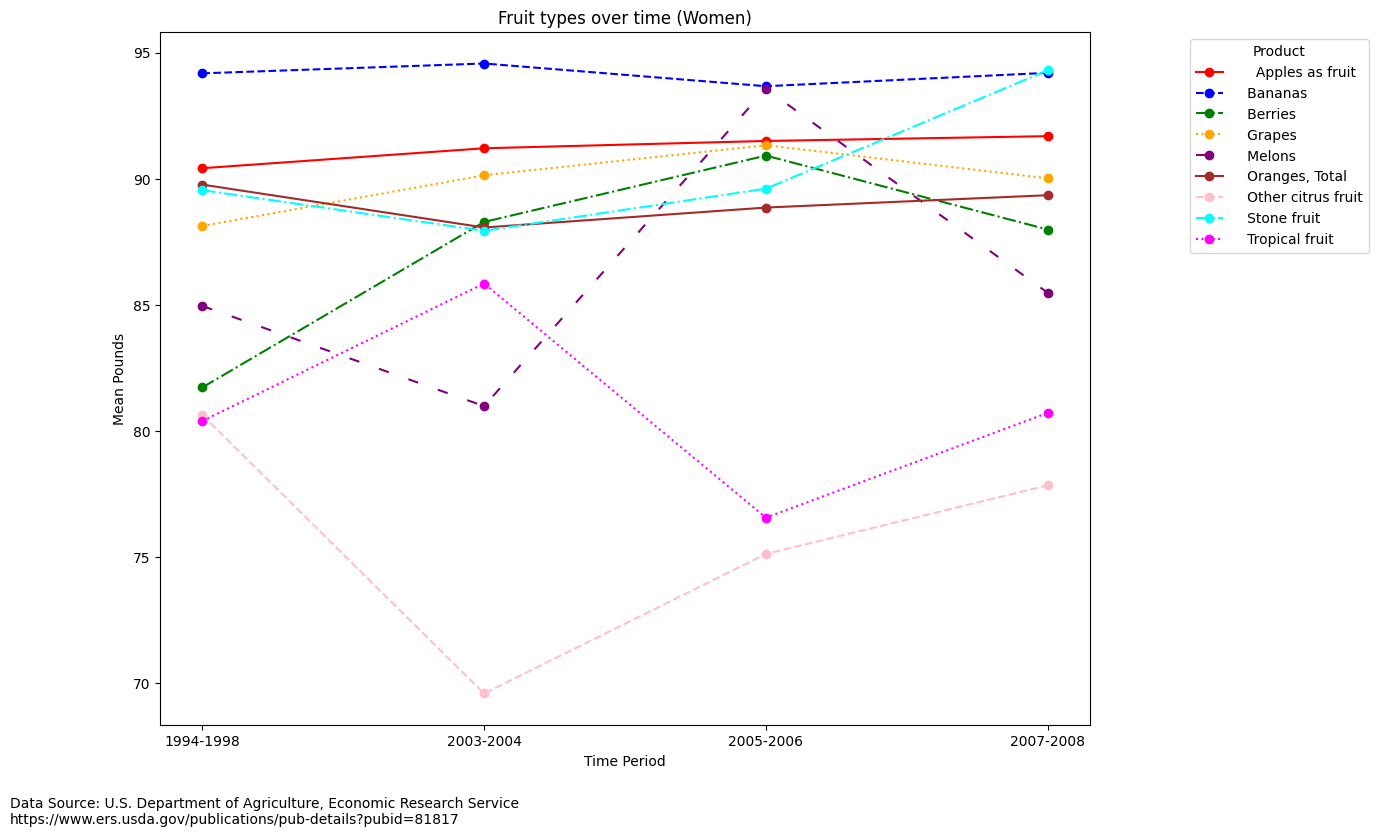

In [301]:
plot_lines(w_fruit_df, "Fruit types over time (Women)", "Mean Pounds")

Caption: This line plot shows women’s mean pounds of fruit consumption from various time periods between 1994–2008, with bananas appearing the most consumed fruit, alongside apples, until about 2005, where stone fruit takes a drastic increase, surpassing the apples. Citrus fruit and tropical fruit remain almost consistently the lowest amount consumed, also being the two fruits that fluctuated in consumption the most over our time periods, compared to the almost steady rate of consumption in all other fruits.

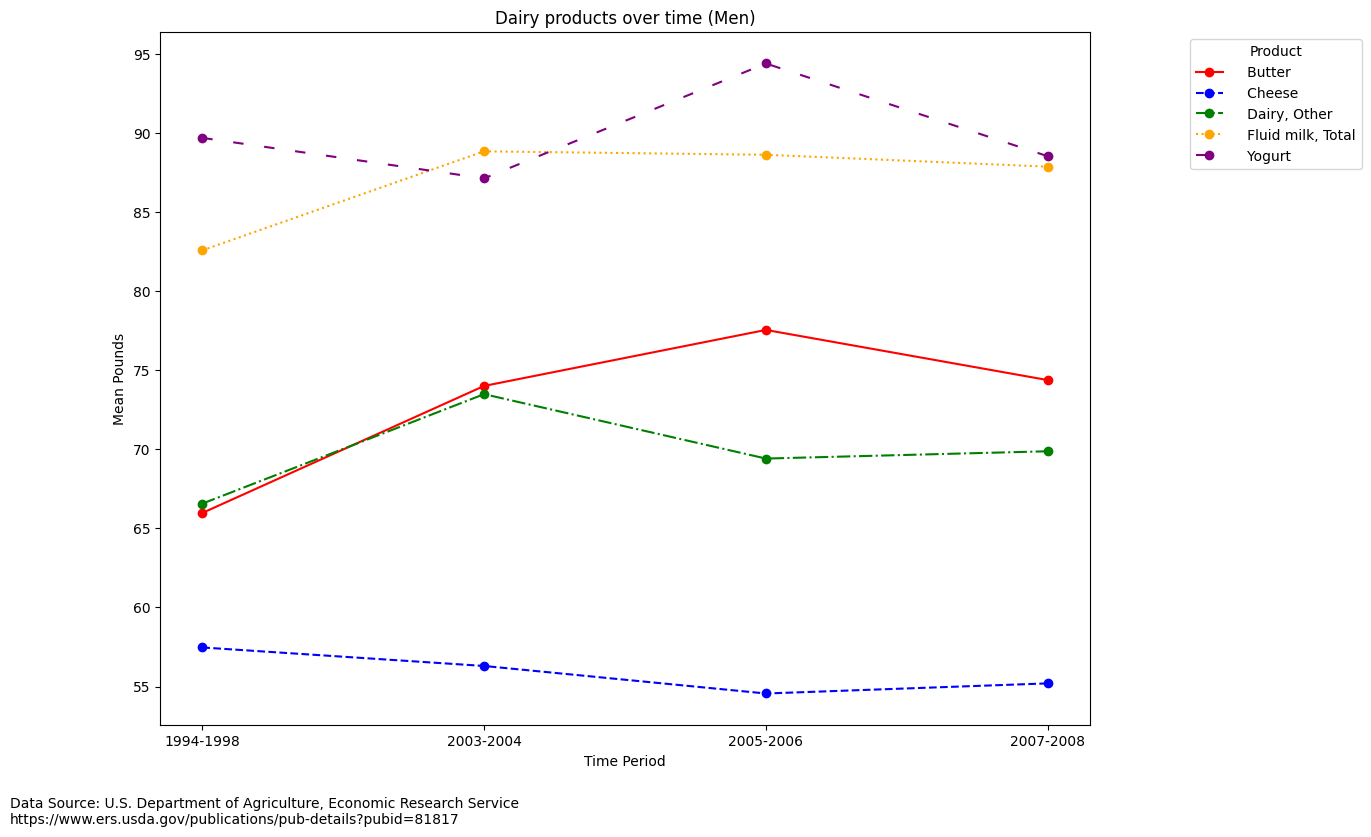

In [302]:
plot_lines(m_dairy_df, "Dairy products over time (Men)", "Mean Pounds")

Caption: This figure shows men’s mean pounds of dairy consumption, with yogurt significantly dominating all other products in consumption from 1994-2008, and cheese being the least consumed by a vast difference from 1994-2008. Dairy, other, and fluid milk appear to fluctuate over the time periods but ultimately end on a minor increase from 2005-2008 in comparison to its highest consumption amount in 2003 to 2004.

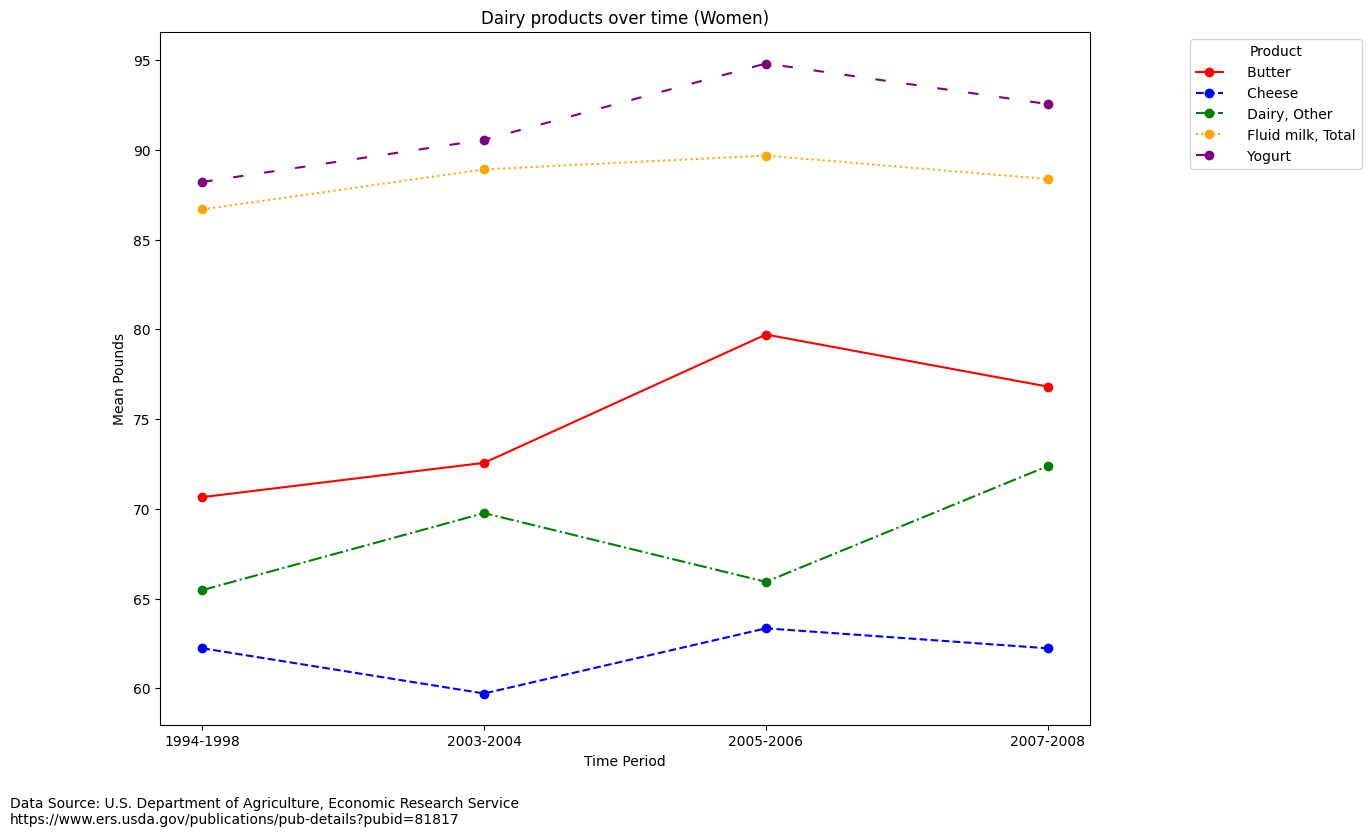

In [303]:
plot_lines(w_dairy_df, "Dairy products over time (Women)", "Mean Pounds")

Caption: This line plot shows women’s mean pounds of dairy consumption for five products from 1994–2008, with yogurt consistently remaining the highest, but dairy, other showing the largest overall growth. In comparison, fluid milk, other remains the most steady rate of consumption, being the second most consumed but remaining around 87 mean pounds of consumption throughout the time periods,